In [1]:
library(randomcoloR)
library(tidyverse)
library(scales)

`%notin%` <- Negate(`%in%`)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:

setwd("/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/rRNA/")


#read input data
input_data <- read.csv(file="rRNA_O2_transcripts_stats_no2017.csv", header=TRUE, stringsAsFactors = FALSE)

#remove "Unclassified" from data
rows_toss <- input_data$Best_classification == "Unclassified"
input_data <- input_data[!rows_toss,]

#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))         #print summary to get slope, intercept, Rsq to hard code onto plot

#define color vector
color_val <- input_data$Family
color_unique <- unique(color_val)
set.seed(123456)
col_pal <- distinctColorPalette(k=length(color_unique))
color2_val <- rep(NA, length(color_val))
for (i in 1:length(color_val)){
  pt_color <- col_pal[color_val[i] == color_unique]
  color2_val[i] <- pt_color
}

#define shape vector
shape_val <- input_data$date
shape_unique <- unique(shape_val)
shape2_val <- rep(15, length(shape_val))
shape2_val[shape_val == shape_unique[2]] <- 16
shape2_val[shape_val == shape_unique[3]] <- 17

#define size vector
size_val <- input_data$median.estimated.diameter

#open file for plotting
file_name <- "Log10_rRNA_weighted_avg_O2_consumed_R3.pdf"
pdf(file=file_name,height=7,width=13)

#region of space used by the plot
par(plt=c(0.2,0.75,0.2,0.85))   

#create basic plot
plot(x=x, y=y, type="p", log="xy",
     xlab="Weighted fmol oxygen consumed/cell/hour",
     ylab="Average number of 16S rRNA copies per cell",
     xlim=c(0.002,2.00),         #limits on x axis
     xaxp=c(0.001,10.00,1),      #locations of major tick marks on x axis
     ylim=c(50,3000),            #limits on y axis
     yaxp=c(100,1000,1),         #locations of major tick marks on y axis
     col=color2_val,             #symbol colors
     pch=shape2_val,             #symbol shape
     cex=(0.5+2.0*size_val)/1.5, #symbol size
     las=1)

#add minor x tick marks
axis(side=1, at=c((2:9)*0.001,(2:9)*0.01,(2:8)*0.1,2), 
     labels = FALSE, tcl=-0.3)

#add minor y tick marks
axis(side=2, at=c((6:9)*10,(2:9)*100,2000,3000), 
     labels = FALSE, tcl=-0.3) 

#add regression line
abline(lm(y~., data_frame), lwd=3)

#add legend
legend(x=2.63, y=3534,
       legend=c("Family",color_unique,                                      #text for family
                "Median Estimated Diameter","0.30","0.45","0.60","0.75",    #text for diameter
                "Date", shape_unique),                                      #text for shape
       col=c("white",col_pal,                                               #colors for family
             "white",rep("black",4),                                        #colors for diameter
             "white",rep("black",3)),                                       #colors for dates
       pch=c(rep(16,27),                                                    #shapes for family
                 15,15,15,15,15,                                            #shapes for diameter
                 15,15,16,17),                                              #shapes for dates
       pt.cex=c(rep(1.4,28),                                                #size for family
                (0.5+2.0*0.30)/1.5,                                         #size for diameter 1
                (0.5+2.0*0.45)/1.5,                                         #size for diameter 2
                (0.5+2.0*0.60)/1.5,                                         #size for diameter 3
                (0.5+2.0*0.75)/1.5,                                         #size for diameter 4
                rep(1.2,4)),                                                #size for date
       cex=0.61485 , xpd=NA)

#add text to graph
text(x=0.8, y=675, labels=c("Slope = 0.266     \nIntercept = 3.074\nRsq = 0.156        "), 
     cex=0.9)

#close file
dev.off()




Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79477 -0.23730 -0.04914  0.21167  0.90866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0958     0.1725  17.950  < 2e-16 ***
x             0.2709     0.0810   3.345  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3678 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1431 
F-statistic: 11.19 on 1 and 60 DF,  p-value: 0.001425



png 
  2

In [3]:


### mRNA version

#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$mRNA_transcripts_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))         #print summary to get slope, intercept, Rsq to hard code onto plot

#define shape vector
shape_val <- input_data$date
shape_unique <- unique(shape_val)
shape2_val <- rep(15, length(shape_val))
shape2_val[shape_val == shape_unique[2]] <- 16
shape2_val[shape_val == shape_unique[3]] <- 17

#define size vector
size_val <- input_data$median.estimated.diameter

#open file for plotting
file_name <- "Log10_mRNA_weighted_avg_O2_consumed_R2.pdf"
pdf(file=file_name,height=7,width=13)

#region of space used by the plot
par(plt=c(0.2,0.75,0.2,0.85))   

#create basic plot
plot(x=x, y=y, type="p", log="xy",
     xlab="Weighted fmol oxygen consumed/cell/hour",
     ylab="Average number of mRNA copies per cell",
     xlim=c(0.002,2.00),         #limits on x axis
     xaxp=c(0.001,10.00,1),      #locations of major tick marks on x axis
     ylim=c(4,200),            #limits on y axis
     yaxp=c(1,100,1),         #locations of major tick marks on y axis
     col=color2_val,             #symbol colors
     pch=shape2_val,             #symbol shape
     cex=(0.5+2.0*size_val)/1.5, #symbol size
     las=1)

#add minor x tick marks
axis(side=1, at=c((2:9)*0.001,(2:9)*0.01,(2:8)*0.1,2), 
     labels = FALSE, tcl=-0.3)

#add minor y tick marks
axis(side=2, at=c((2:9)*1,(2:9)*10,(2:9)*100,2000,3000), 
     labels = FALSE, tcl=-0.3) 

#add regression line
abline(lm(y~., data_frame), lwd=3)

#add legend
legend(x=2.63, y=233.85,
       legend=c("Family",color_unique,                                      #text for family
                "Median Estimated Diameter","0.30","0.45","0.60","0.75",    #text for diameter
                "Date", shape_unique),                                      #text for shape
       col=c("white",col_pal,                                               #colors for family
             "white",rep("black",4),                                        #colors for diameter
             "white",rep("black",3)),                                       #colors for dates
       pch=c(rep(16,27),                                                    #shapes for family
             15,15,15,15,15,                                            #shapes for diameter
             15,15,16,17),                                              #shapes for dates
       pt.cex=c(rep(1.4,28),                                                #size for family
                (0.5+2.0*0.30)/1.5,                                         #size for diameter 1
                (0.5+2.0*0.45)/1.5,                                         #size for diameter 2
                (0.5+2.0*0.60)/1.5,                                         #size for diameter 3
                (0.5+2.0*0.75)/1.5,                                         #size for diameter 4
                rep(1.2,4)),                                                #size for date
       cex=0.61485 , xpd=NA)

#add text to graph
text(x=0.9, y=50, labels=c("Slope = 0.049     \nIntercept = 1.561\nRsq = 0.007        "), 
     cex=0.9)

#close file
dev.off()




Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70053 -0.23708 -0.06622  0.28312  0.72128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.57947    0.15036  10.505 7.02e-16 ***
x            0.05963    0.06979   0.854    0.396    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3223 on 68 degrees of freedom
Multiple R-squared:  0.01062,	Adjusted R-squared:  -0.003926 
F-statistic: 0.7301 on 1 and 68 DF,  p-value: 0.3958



png 
  2


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79477 -0.23730 -0.04914  0.21167  0.90866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0958     0.1725  17.950  < 2e-16 ***
x             0.2709     0.0810   3.345  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3678 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1431 
F-statistic: 11.19 on 1 and 60 DF,  p-value: 0.001425



Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


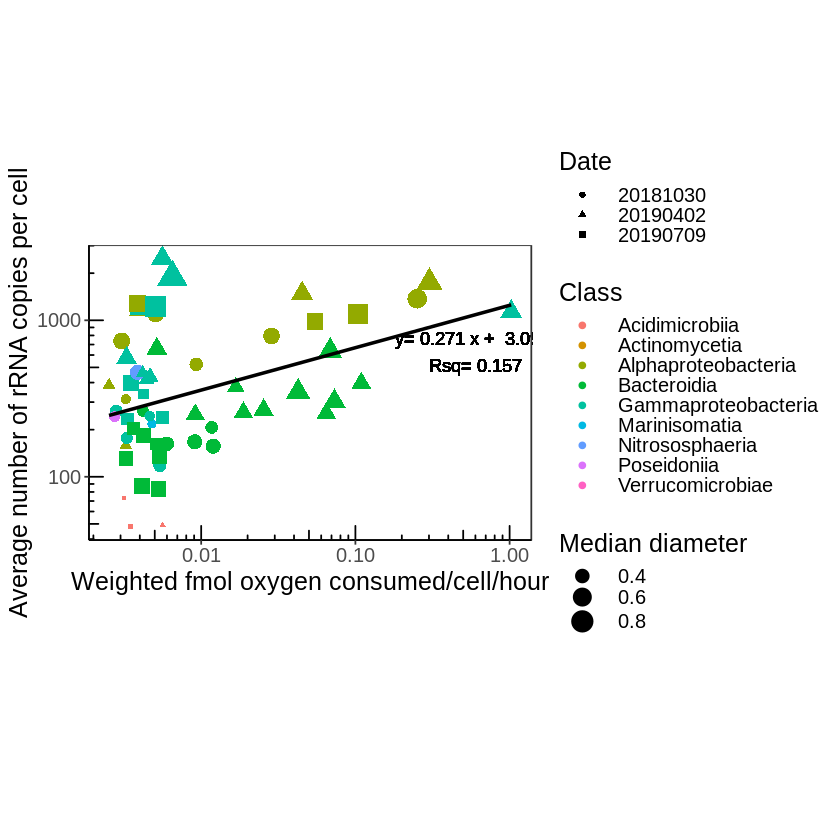

In [4]:

#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

input_data$date <-factor(input_data$date)

p1 <- ggplot(input_data, aes(x=x, y=y)) + 
    geom_point(aes(color=Class, size=median.estimated.diameter, shape=date)) + 
    scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0))+ 
    scale_y_log10(breaks=c(100, 1000)) + 
#    scale_y_continuous(breaks=c(10, 100, 1000)) +
    annotation_logticks() + 
    labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
    theme_bw() + 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(aspect.ratio=10/15) +
    scale_shape_discrete(name= 'Date') +
    scale_size(name ='Median diameter') +
    scale_color_discrete(name='Class') +
    geom_smooth(method="lm", se=FALSE, color="black", formula =y~x) +
    geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 625),  alpha=1, colour='black') +
    theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
    theme(text = element_text(size = 15, color='black'))


ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_class_no2017.pdf", width=15, height=10, units = "in")        

print(p1)



Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79477 -0.23730 -0.04914  0.21167  0.90866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0958     0.1725  17.950  < 2e-16 ***
x             0.2709     0.0810   3.345  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3678 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1431 
F-statistic: 11.19 on 1 and 60 DF,  p-value: 0.001425



Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 9. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 9. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


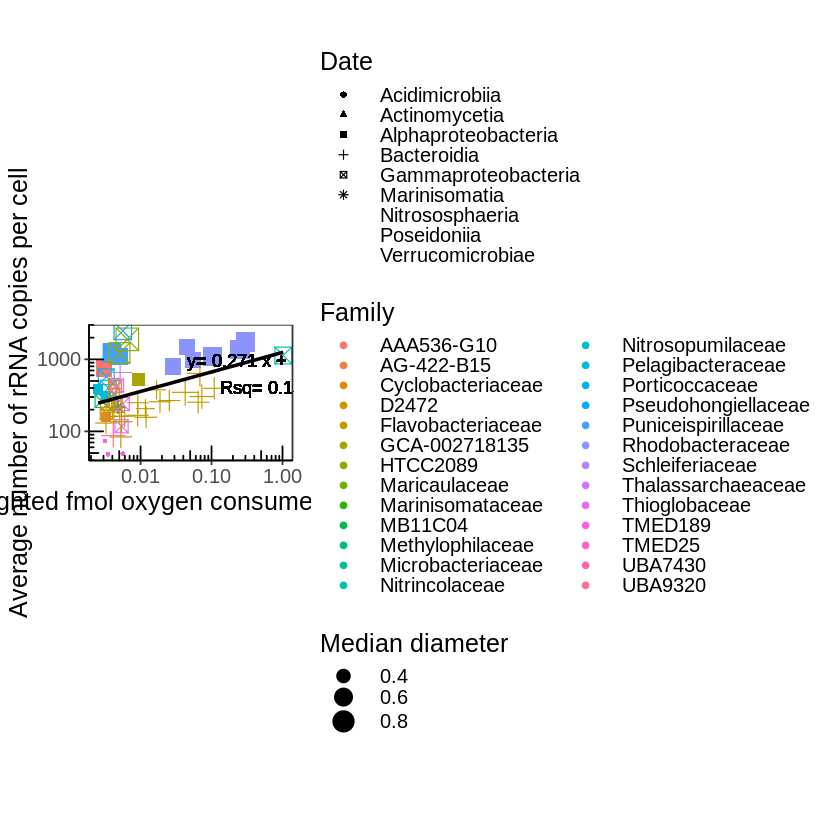

In [5]:
#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)
p1a <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=median.estimated.diameter, shape=Class)) + 
        scale_x_log10() +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Date')+
        scale_size(name ='Median diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 625),  alpha=1, colour='black') +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_Family_no2017.pdf", width=15, height=10, units = "in")        

print(p1a)
    


In [6]:
correlated_fam <- list('Nitrincolaceae', 'Rhodobacteraceae', 'Cyclobacteriaceae', 'Flavobacteriaceae')
correlated_class <- list('Alphaproteobacteria', 'Gammaproteobacteria', 'Bacteroidia')
colnames(input_data)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "genus"                                    
 [4] "date"                                     
 [5] "mRNA_transcripts_per_cell"                
 [6] "Weighted_avg_O2_consumed_per_cell"        
 [7] "X16S_copies_per_cell"                     
 [8] "full_GTDBtk_classification"               
 [9] "X._of_cells"                              
[10] "genus_size_rank"                          
[11] "Domain"                                   
[12] "Phyla"                                    
[13] "Class"                                    
[14] "Order"                                    
[15] "Family"                                   
[16] "Genus"                                    
[17] "Species"                                  
[18] "Best_classification"                      
[19] "Average_gc_content"                       
[20] "Average_hypothetical_cds_fraction"        
[21] "median.estimated.diameter"                
[22] "mean_estimated_genome_length"             
[23] "Average_mininum_doubling_time"            
[24] "median_mininum_doubling_time"             
[25] "log_weighted_avg_O2_consumed_per_cell"    
[26] "log_mRNA_transcripts_per_cell"            
[27] "log_16S_copies_per_cell"                  
[28] "ratio16S_to_fmol_O2_consumed"             
[29] "ratio_mRNA_to_fmol_O2_consumed"           
[30] "log_ratio16S_to_fmol_O2_consumed"         
[31] "log_ratio_mRNA_to_fmol_O2_consumed"       
[32] "cytochrome_c_oxidase_transcripts_per_cell"
[33] "nirA_transcripts_per_cell"                
[34] "cysH_transcripts_per_cell"                
[35] "bacteriochlorophyll_transcripts_per_cell" 
[36] "proteorhodopsin_transcripts_per_cell"     
[37] "Hypothetical"                             
[38] "Non_hypothetical"                         
[39] "total"                                    
[40] "percent_reads_hypothetical"

In [7]:
# create dfs of the families where 16S and O2 are correlated and those where they are not
correlated = input_data[input_data$Family %in% correlated_fam ,]

uncor= input_data[input_data$Family %notin% correlated_fam ,]



Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33384 -0.12097 -0.02283  0.13769  0.50538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.28713    0.11111  29.584  < 2e-16 ***
x            0.46203    0.06351   7.275 1.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2151 on 25 degrees of freedom
Multiple R-squared:  0.6792,	Adjusted R-squared:  0.6664 
F-statistic: 52.93 on 1 and 25 DF,  p-value: 1.269e-07



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



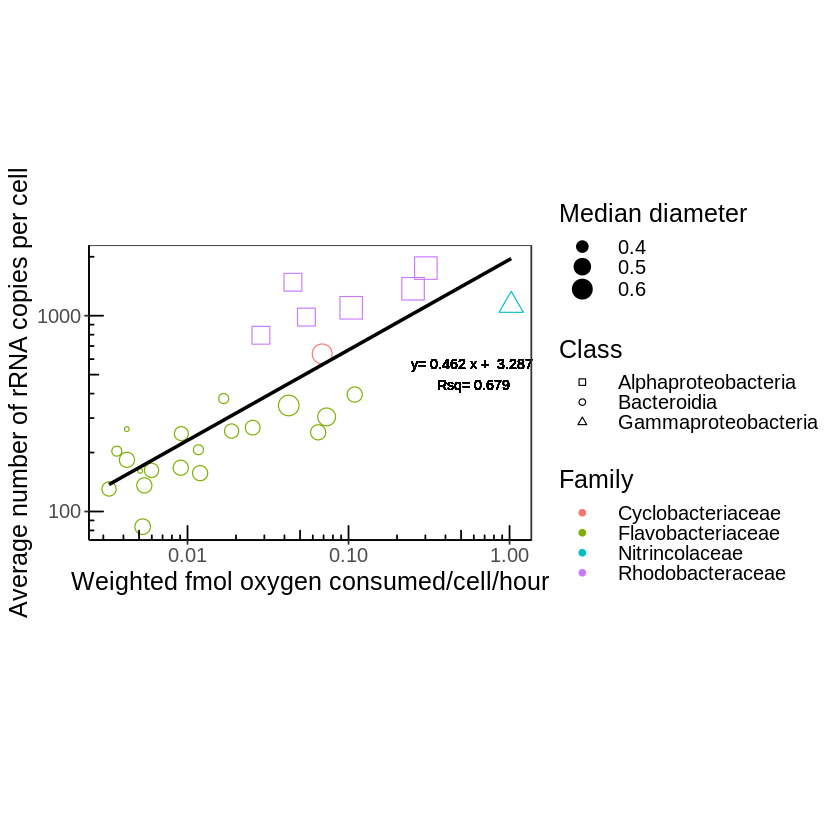

In [8]:
#define (x,y) vectors for plotting
x <- correlated$Weighted_avg_O2_consumed_per_cell
y <- correlated$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p2 <- ggplot(correlated, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=median.estimated.diameter, shape=Class)) + 
        scale_x_log10() +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Date')+
        scale_size(name ='Median diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 500),  alpha=1, colour='black', size=3) +
        scale_shape_manual(values = 0:8) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_Family_no2017_correlated.pdf", width=15, height=10, units = "in")        

print(p2)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94919 -0.25048  0.00804  0.25140  0.75477 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   4.3512     1.4439   3.014  0.00493 **
x             0.7602     0.6064   1.254  0.21878   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4175 on 33 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.04546,	Adjusted R-squared:  0.01653 
F-statistic: 1.572 on 1 and 33 DF,  p-value: 0.2188



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


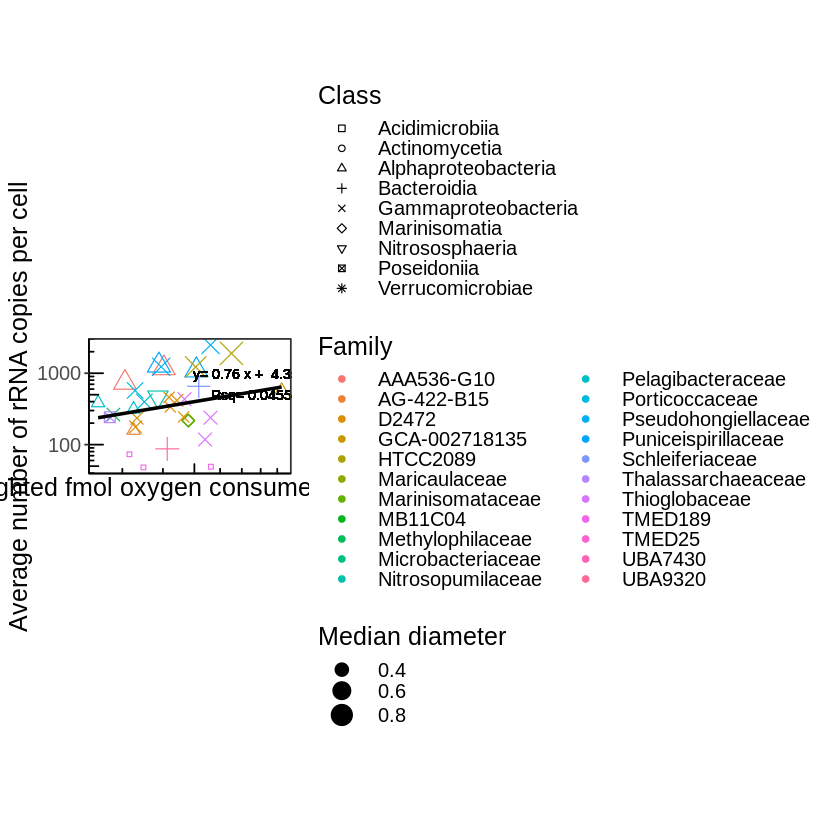

In [9]:
#define (x,y) vectors for plotting
x <- uncor$Weighted_avg_O2_consumed_per_cell
y <- uncor$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p3 <- ggplot(uncor, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=median.estimated.diameter, shape=Class)) + 
        scale_x_log10(breaks=c(0.001, 0.01)) +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Date')+
        scale_size(name ='Median diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.0075, y = 700),  alpha=1, colour='black', size=3) +
        scale_shape_manual(values = 0:10) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_Family_no2017_uncorrelated.pdf", width=15, height=10, units = "in")        

print(p3)

In [10]:
# create lists of classes where 16S and O2 consumption are correlated with and not correlated 
corr_class = input_data[input_data$Class %in% correlated_class ,]

uncor_class= input_data[input_data$Class %notin% correlated_class ,]



Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61507 -0.26181 -0.05646  0.22499  0.85092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.04653    0.16699  18.244  < 2e-16 ***
x            0.22339    0.08019   2.786  0.00748 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3528 on 51 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.1321,	Adjusted R-squared:  0.115 
F-statistic:  7.76 on 1 and 51 DF,  p-value: 0.00748



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


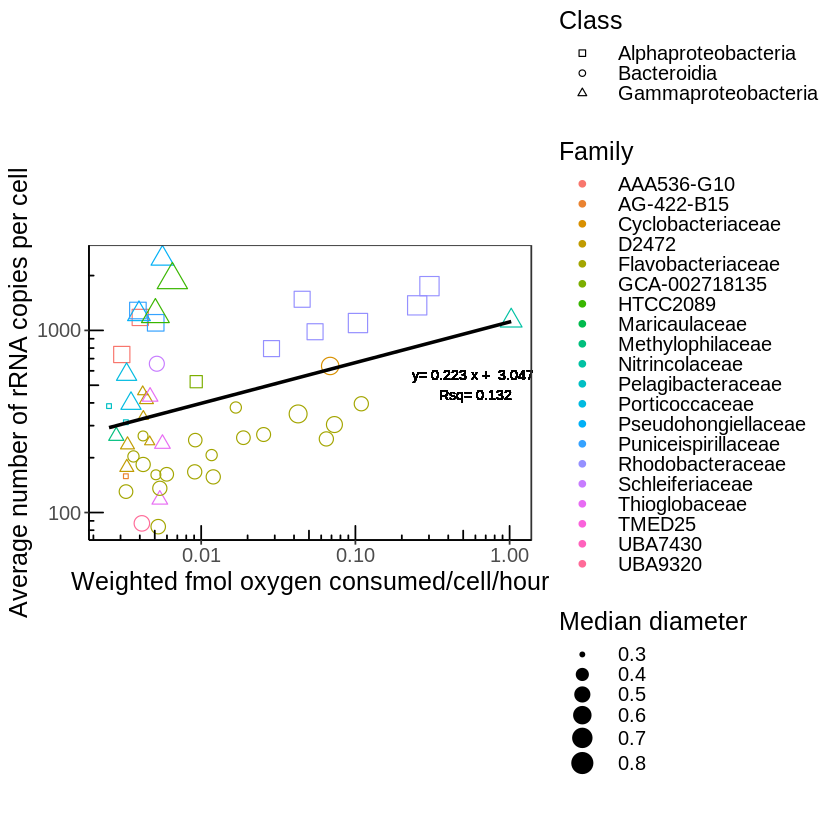

In [11]:
#define (x,y) vectors for plotting
x <- corr_class$Weighted_avg_O2_consumed_per_cell
y <- corr_class$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p4 <- ggplot(corr_class, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=median.estimated.diameter, shape=Class)) + 
        scale_x_log10() +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Date')+
        scale_size(name ='Median diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 500),  alpha=1, colour='black', size=3) +
        scale_shape_manual(values = 0:8) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_Class_no2017_correlated.pdf", width=15, height=10, units = "in")        

print(p4)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5022 -0.3192  0.1565  0.1565  0.4854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.13556    3.02180   0.707    0.503
x           -0.01949    1.26606  -0.015    0.988

Residual standard error: 0.3713 on 7 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  3.385e-05,	Adjusted R-squared:  -0.1428 
F-statistic: 0.0002369 on 1 and 7 DF,  p-value: 0.9881



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


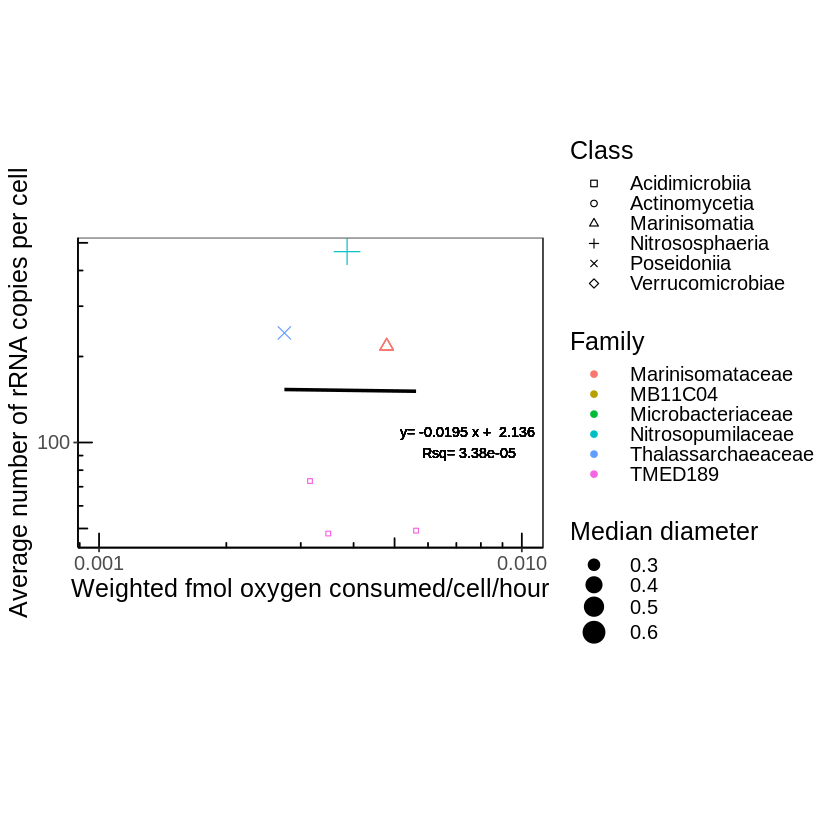

In [12]:
#define (x,y) vectors for plotting
x <- uncor_class$Weighted_avg_O2_consumed_per_cell
y <- uncor_class$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p5 <- ggplot(uncor_class, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=median.estimated.diameter, shape=Class)) + 
        scale_x_log10(breaks=c(0.001, 0.01), limits=c(0.001, 0.01)) +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Date')+
        scale_size(name ='Median diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.0075, y = 100),  alpha=1, colour='black', size=3) +
        scale_shape_manual(values = 0:8) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_Class_no2017_uncorrelated.pdf", width=15, height=10, units = "in")        

print(p5)

In [13]:
keep <- input_data$Weighted_avg_O2_consumed_per_cell >=0.01
O2lim=input_data[keep,]
O2lim

,X,Unnamed..0,genus,date,mRNA_transcripts_per_cell,Weighted_avg_O2_consumed_per_cell,X16S_copies_per_cell,full_GTDBtk_classification,X._of_cells,genus_size_rank,⋯,log_ratio_mRNA_to_fmol_O2_consumed,cytochrome_c_oxidase_transcripts_per_cell,nirA_transcripts_per_cell,cysH_transcripts_per_cell,bacteriochlorophyll_transcripts_per_cell,proteorhodopsin_transcripts_per_cell,Hypothetical,Non_hypothetical,total,percent_reads_hypothetical
,<int>,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,4,4,ASP10-02a,20190402,76.94872,1.02391660,1130.1127,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Nitrincolaceae;g__ASP10-02a;s__,18,36,⋯,1.875937,NA,NA,NA,NA,0.66019417,7.380764,83.65898,91.03974,8.107189
6,5,5,Amylibacter,20181030,51.93327,0.02857882,794.5390,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Amylibacter;s__,159,5,⋯,3.259401,NA,NA,NA,NA,0.11417670,111.071092,53.75724,164.82834,67.385921
7,6,6,Amylibacter,20190402,76.58000,0.04515786,1482.3686,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Amylibacter;s__,159,5,⋯,3.229382,NA,NA,NA,NA,0.27807654,75.984822,78.79486,154.77968,49.092246
8,7,7,Amylibacter,20190709,56.56720,0.05475879,983.3333,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Amylibacter;s__,159,5,⋯,3.014111,NA,NA,NA,NA,0.09536683,135.215488,58.66160,193.87709,69.742891
14,13,13,GCA-002733185,20190402,19.74828,0.07310990,304.1486,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__GCA-002733185;s__,14,54,⋯,2.431553,0.077141713,NA,NA,NA,0.01402577,13.324478,22.30097,35.62545,37.401575
15,14,14,HC6-5,20190402,14.09957,0.04252069,347.8791,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__HC6-5;s__,42,21,⋯,2.520606,0.075197722,NA,NA,NA,0.07310890,11.127174,15.47611,26.60328,41.826319
22,21,21,MAG-121220-bin8,20181030,12.76357,0.01168933,206.7563,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__MAG-121220-bin8;s__,104,8,⋯,3.038182,0.004951917,NA,NA,NA,0.07675472,4.446822,15.31876,19.76558,22.497808
23,22,22,MAG-121220-bin8,20190402,21.42194,0.01677171,377.3498,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__MAG-121220-bin8;s__,104,8,⋯,3.106281,0.009332144,NA,NA,NA,0.17031163,6.408850,25.24112,31.64997,20.249152
32,31,31,MS024-2A,20190402,22.97748,0.01878057,257.5803,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__MS024-2A;s__,94,9,⋯,3.087593,0.035852513,NA,NA,NA,0.30275456,8.596636,27.00093,35.59756,24.149508



Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34049 -0.22036 -0.09279  0.19879  0.49654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2772     0.1604  20.435 2.31e-12 ***
x             0.4480     0.1200   3.733    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2509 on 15 degrees of freedom
Multiple R-squared:  0.4816,	Adjusted R-squared:  0.447 
F-statistic: 13.93 on 1 and 15 DF,  p-value: 0.002



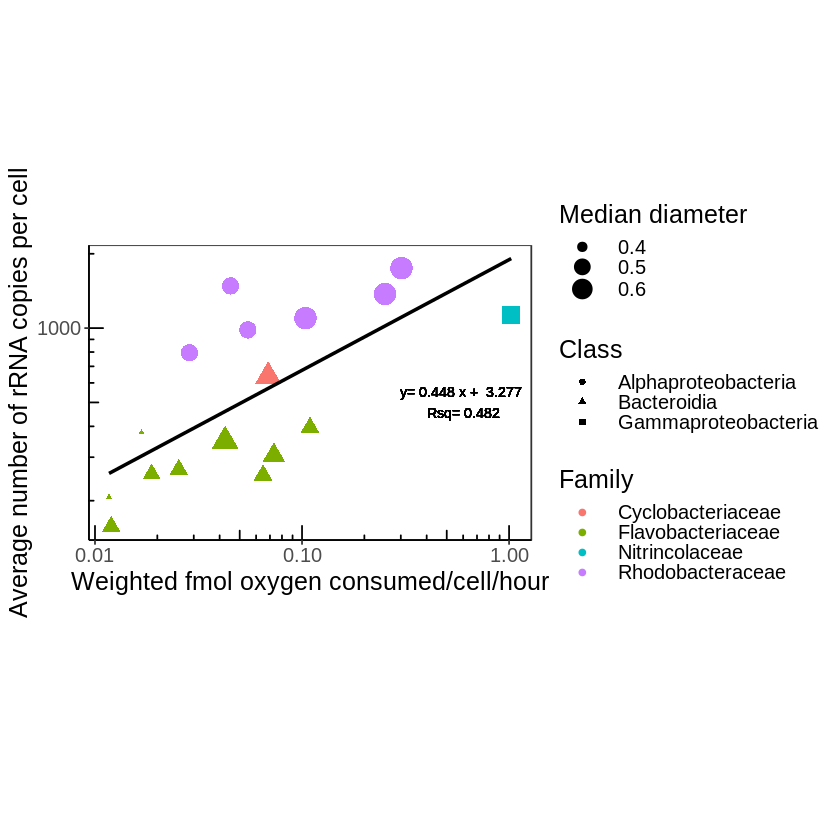

In [14]:
#define (x,y) vectors for plotting
x <- O2lim$Weighted_avg_O2_consumed_per_cell
y <- O2lim$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p6 <- ggplot(O2lim, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=median.estimated.diameter, shape=Class)) + 
        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_size(name ='Median diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 500),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_0.01minO2.pdf", width=15, height=10, units = "in")        

print(p6)

In [15]:
colnames(input_data)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "genus"                                    
 [4] "date"                                     
 [5] "mRNA_transcripts_per_cell"                
 [6] "Weighted_avg_O2_consumed_per_cell"        
 [7] "X16S_copies_per_cell"                     
 [8] "full_GTDBtk_classification"               
 [9] "X._of_cells"                              
[10] "genus_size_rank"                          
[11] "Domain"                                   
[12] "Phyla"                                    
[13] "Class"                                    
[14] "Order"                                    
[15] "Family"                                   
[16] "Genus"                                    
[17] "Species"                                  
[18] "Best_classification"                      
[19] "Average_gc_content"                       
[20] "Average_hypothetical_cds_fraction"        
[21] "median.estimated.diameter"                
[22] "mean_estimated_genome_length"             
[23] "Average_mininum_doubling_time"            
[24] "median_mininum_doubling_time"             
[25] "log_weighted_avg_O2_consumed_per_cell"    
[26] "log_mRNA_transcripts_per_cell"            
[27] "log_16S_copies_per_cell"                  
[28] "ratio16S_to_fmol_O2_consumed"             
[29] "ratio_mRNA_to_fmol_O2_consumed"           
[30] "log_ratio16S_to_fmol_O2_consumed"         
[31] "log_ratio_mRNA_to_fmol_O2_consumed"       
[32] "cytochrome_c_oxidase_transcripts_per_cell"
[33] "nirA_transcripts_per_cell"                
[34] "cysH_transcripts_per_cell"                
[35] "bacteriochlorophyll_transcripts_per_cell" 
[36] "proteorhodopsin_transcripts_per_cell"     
[37] "Hypothetical"                             
[38] "Non_hypothetical"                         
[39] "total"                                    
[40] "percent_reads_hypothetical"


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7383 -0.1611  0.0244  0.1930  0.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6146     0.1248  12.942  < 2e-16 ***
x             2.0466     0.2640   7.751  1.3e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2832 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.5003,	Adjusted R-squared:  0.492 
F-statistic: 60.08 on 1 and 60 DF,  p-value: 1.304e-10



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


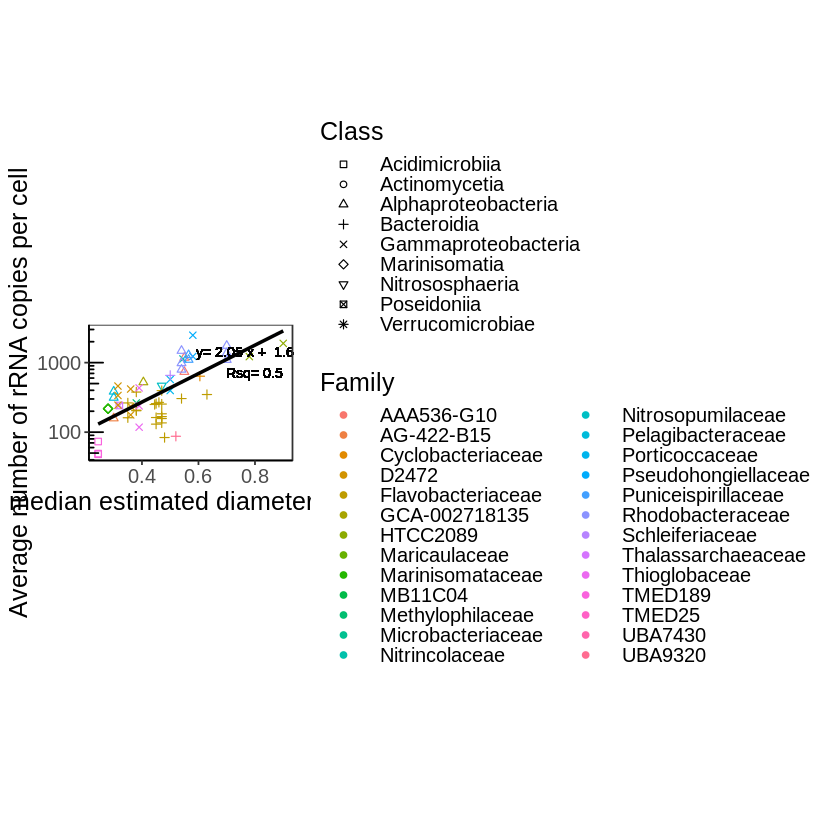

In [16]:
#define (x,y) vectors for plotting
x <- input_data$median.estimated.diameter
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p6 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class)) + 
#        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks(sides='l') + 
        labs(x='median estimated diameter (um)', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.8, y = 1000),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_diameter.pdf", width=15, height=10, units = "in")        

print(p6)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61554 -0.22558 -0.03715  0.20852  0.82159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0571     0.1252   8.443 3.44e-12 ***
x             0.8896     0.2679   3.320  0.00145 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3006 on 68 degrees of freedom
Multiple R-squared:  0.1395,	Adjusted R-squared:  0.1268 
F-statistic: 11.02 on 1 and 68 DF,  p-value: 0.00145



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



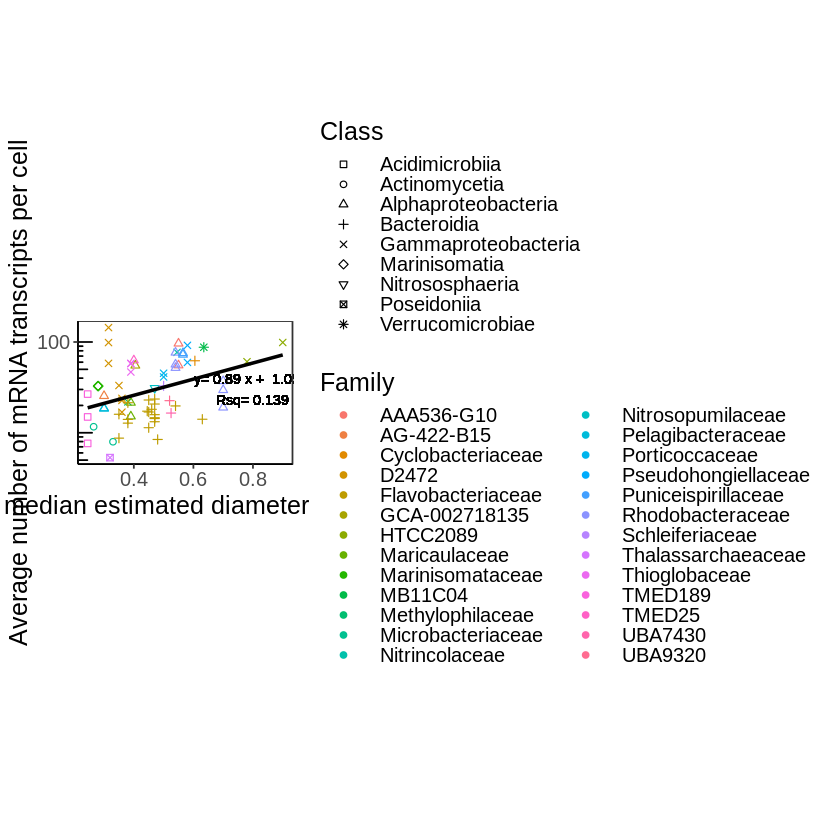

In [17]:

#define (x,y) vectors for plotting
x <- input_data$median.estimated.diameter
y <- input_data$mRNA_transcripts_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p6a <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class)) + 
#        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks(sides='l') + 
        labs(x='median estimated diameter (um)', y='Average number of mRNA transcripts per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.8, y = 30),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_mRNA_diameter.pdf", width=15, height=10, units = "in")        

print(p6a)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79477 -0.23730 -0.04914  0.21167  0.90866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0958     0.1725  17.950  < 2e-16 ***
x             0.2709     0.0810   3.345  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3678 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1431 
F-statistic: 11.19 on 1 and 60 DF,  p-value: 0.001425



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


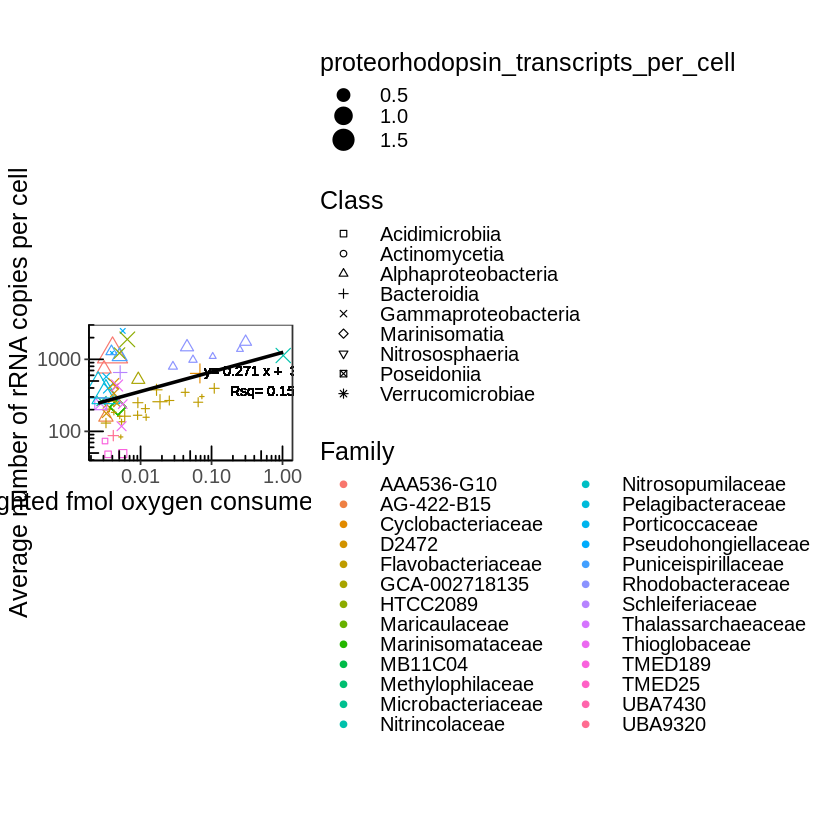

In [18]:
#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p1c <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class, size=proteorhodopsin_transcripts_per_cell)) + 
        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(10, 100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_size(name ='Rhodhopsin transcripts per cell') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 500),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black')) +
        scale_size_continuous(range = c(1,4))+ scale_size_area()


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_16S_O2_rhodhopsin.pdf", width=15, height=10, units = "in")        

print(p1c)

In [19]:
all_genera <-read.csv(file="rRNA_O2_transcripts_stats_all_genera.csv", header=TRUE, stringsAsFactors = FALSE)
colnames(all_genera)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "genus"                                    
 [4] "date"                                     
 [5] "mRNA_transcripts_per_cell"                
 [6] "Weighted_avg_O2_consumed_per_cell"        
 [7] "X16S_copies_per_cell"                     
 [8] "full_GTDBtk_classification"               
 [9] "X._of_cells"                              
[10] "genus_size_rank"                          
[11] "Domain"                                   
[12] "Phyla"                                    
[13] "Class"                                    
[14] "Order"                                    
[15] "Family"                                   
[16] "Genus"                                    
[17] "Species"                                  
[18] "Best_classification"                      
[19] "Average_gc_content"                       
[20] "Average_hypothetical_cds_fraction"        
[21] "median.estimated.diameter"                
[22] "mean_estimated_genome_length"             
[23] "Average_mininum_doubling_time"            
[24] "median_mininum_doubling_time"             
[25] "log_weighted_avg_O2_consumed_per_cell"    
[26] "log_mRNA_transcripts_per_cell"            
[27] "log_16S_copies_per_cell"                  
[28] "ratio16S_to_fmol_O2_consumed"             
[29] "ratio_mRNA_to_fmol_O2_consumed"           
[30] "log_ratio16S_to_fmol_O2_consumed"         
[31] "log_ratio_mRNA_to_fmol_O2_consumed"       
[32] "cytochrome_c_oxidase_transcripts_per_cell"
[33] "nirA_transcripts_per_cell"                
[34] "cysH_transcripts_per_cell"                
[35] "bacteriochlorophyll_transcripts_per_cell" 
[36] "proteorhodopsin_transcripts_per_cell"     
[37] "Hypothetical"                             
[38] "Non_hypothetical"                         
[39] "total"                                    
[40] "percent_reads_hypothetical"


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12557 -0.35408 -0.02252  0.33163  1.84696 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.61275    0.04343  37.131  < 2e-16 ***
x            0.37442    0.06477   5.781 1.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5002 on 608 degrees of freedom
Multiple R-squared:  0.0521,	Adjusted R-squared:  0.05055 
F-statistic: 33.42 on 1 and 608 DF,  p-value: 1.187e-08



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



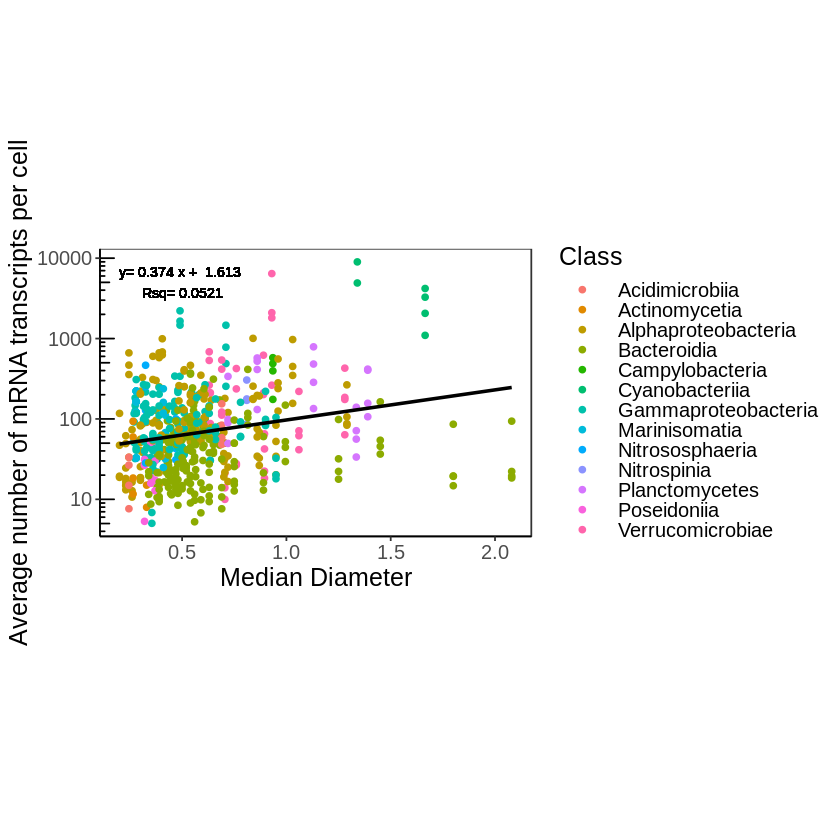

In [20]:
#define (x,y) vectors for plotting
x <- all_genera$median.estimated.diameter
y <- all_genera$mRNA_transcripts_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p8 <- ggplot(all_genera, aes(x=x, y=y)) + 
        geom_point(aes(color=Class)) + 
   #     scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000)) +
        scale_y_log10(breaks=c(0.1, 1, 10, 100,1000, 10000)) +
        annotation_logticks(sides='l') +
        labs(x='Median Diameter', y='Average number of mRNA transcripts per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
   #     scale_size(name ='Rhodhopsin transcripts per cell') +
    #    scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:14) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = .5, y = 5000),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black')) +
        scale_size_continuous(range = c(1,4))+ scale_size_area()

ggsave("Log10_mRNA_Cell_diameter_all_genera.pdf", width=15, height=10, units = "in")        

      
print(p8)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.98192 -0.25599  0.04813  0.36945  1.24520 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.28051    0.07081  32.208  < 2e-16 ***
x            0.29154    0.10446   2.791  0.00554 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.621 on 360 degrees of freedom
  (248 observations deleted due to missingness)
Multiple R-squared:  0.02118,	Adjusted R-squared:  0.01846 
F-statistic: 7.789 on 1 and 360 DF,  p-value: 0.005536



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Warning message:
“Removed 248 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 248 rows containing missing values (geom_point).”
Warning message:
“Removed 248 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 248 rows containing missing values (geom_point).”


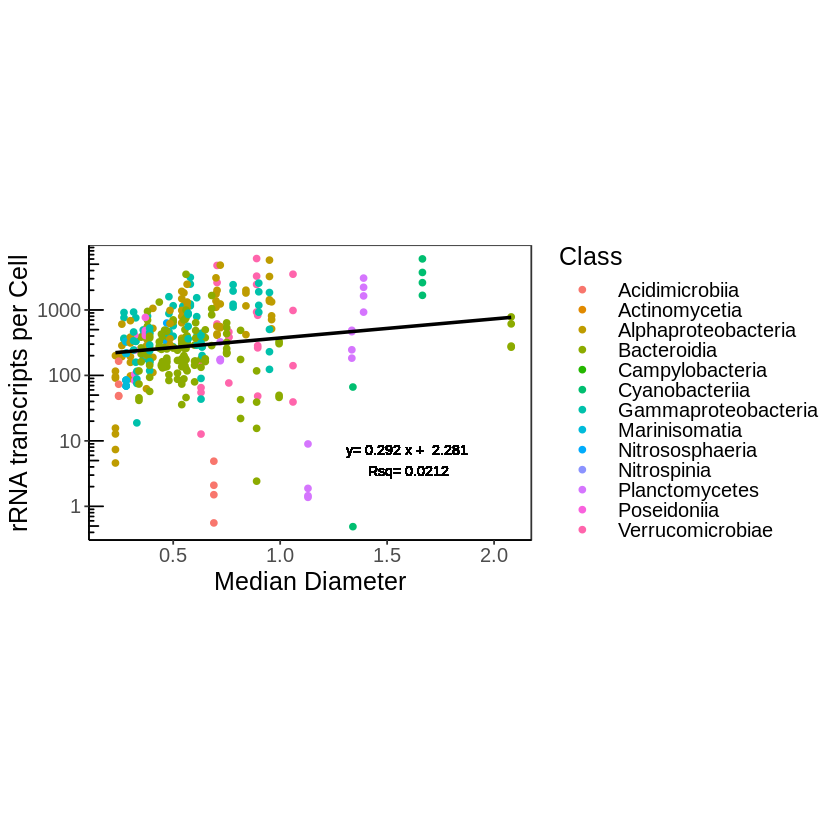

In [21]:
#define (x,y) vectors for plotting
x <- all_genera$median.estimated.diameter
y <- all_genera$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p9 <- ggplot(all_genera, aes(x=x, y=y)) + 
        geom_point(aes(color=Class)) + 
  #      scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000)) +
        scale_y_log10(breaks=c(0.1, 1, 10, 100,1000)) +
        annotation_logticks(sides='l') + 
        labs(x='Median Diameter', y='rRNA transcripts per Cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
   #     scale_size(name ='Rhodhopsin transcripts per cell') +
    #    scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:14) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 1.6, y = 5),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black')) +
        scale_size_continuous(range = c(1,4))+ scale_size_area()


                                            
ggsave("Log10_rRNA_Cell_diameter_all_genera.pdf", width=15, height=10, units = "in")        

print(p9)

Redo rRNA and mRNA v O2 for the above O2 genera with the point sizes scaling with % of reads to hypothetical genes. 

In [22]:
colnames(input_data)

[1] "X"                                        
 [2] "Unnamed..0"                               
 [3] "genus"                                    
 [4] "date"                                     
 [5] "mRNA_transcripts_per_cell"                
 [6] "Weighted_avg_O2_consumed_per_cell"        
 [7] "X16S_copies_per_cell"                     
 [8] "full_GTDBtk_classification"               
 [9] "X._of_cells"                              
[10] "genus_size_rank"                          
[11] "Domain"                                   
[12] "Phyla"                                    
[13] "Class"                                    
[14] "Order"                                    
[15] "Family"                                   
[16] "Genus"                                    
[17] "Species"                                  
[18] "Best_classification"                      
[19] "Average_gc_content"                       
[20] "Average_hypothetical_cds_fraction"        
[21] "median.estimated.diameter"                
[22] "mean_estimated_genome_length"             
[23] "Average_mininum_doubling_time"            
[24] "median_mininum_doubling_time"             
[25] "log_weighted_avg_O2_consumed_per_cell"    
[26] "log_mRNA_transcripts_per_cell"            
[27] "log_16S_copies_per_cell"                  
[28] "ratio16S_to_fmol_O2_consumed"             
[29] "ratio_mRNA_to_fmol_O2_consumed"           
[30] "log_ratio16S_to_fmol_O2_consumed"         
[31] "log_ratio_mRNA_to_fmol_O2_consumed"       
[32] "cytochrome_c_oxidase_transcripts_per_cell"
[33] "nirA_transcripts_per_cell"                
[34] "cysH_transcripts_per_cell"                
[35] "bacteriochlorophyll_transcripts_per_cell" 
[36] "proteorhodopsin_transcripts_per_cell"     
[37] "Hypothetical"                             
[38] "Non_hypothetical"                         
[39] "total"                                    
[40] "percent_reads_hypothetical"


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79477 -0.23730 -0.04914  0.21167  0.90866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0958     0.1725  17.950  < 2e-16 ***
x             0.2709     0.0810   3.345  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3678 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1431 
F-statistic: 11.19 on 1 and 60 DF,  p-value: 0.001425



Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


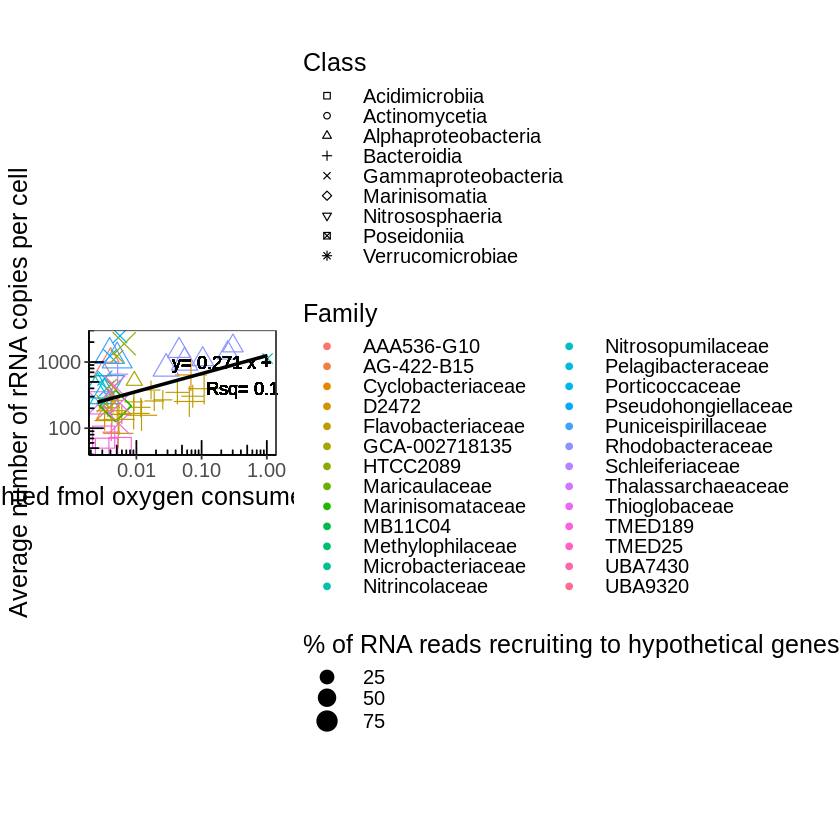

In [23]:
#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame((log10(x)), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p1d <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=percent_reads_hypothetical, shape=Class)) + 
        scale_x_log10() +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_size(name ='% of RNA reads recruiting to hypothetical genes') +
        scale_color_discrete(name='Family') +
        scale_shape_manual(values = 0:14) +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 625),  alpha=1, colour='black') +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_hypothetical_reads_no2017.pdf", width=15, height=10, units = "in")        

print(p1d)
    



Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70053 -0.23708 -0.06622  0.28312  0.72128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.57947    0.15036  10.505 7.02e-16 ***
x            0.05963    0.06979   0.854    0.396    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3223 on 68 degrees of freedom
Multiple R-squared:  0.01062,	Adjusted R-squared:  -0.003926 
F-statistic: 0.7301 on 1 and 68 DF,  p-value: 0.3958



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



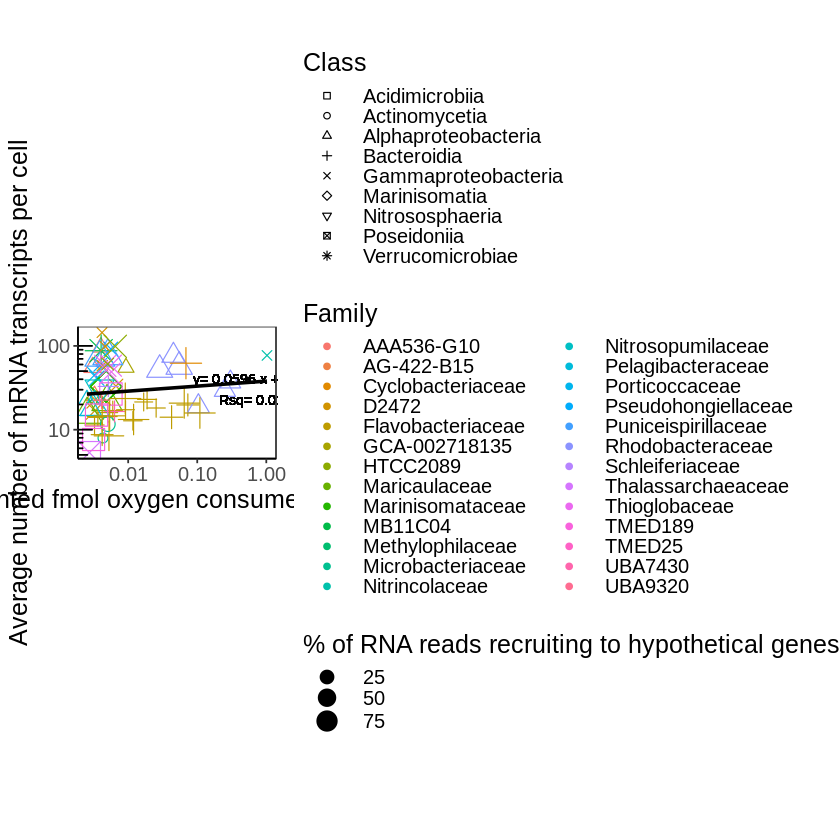

In [24]:
#define (x,y) vectors for plotting
x <- input_data$Weighted_avg_O2_consumed_per_cell
y <- input_data$mRNA_transcripts_per_cell

#create linear regression model
data_frame <- data.frame((log10(x)), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p10 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=percent_reads_hypothetical, shape=Class)) + 
        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(10,100,1000)) +
        annotation_logticks(sides='l') + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of mRNA transcripts per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        scale_size(name ='% of RNA reads recruiting to hypothetical genes') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.8, y = 30),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_mRNA_weighted_avg_O2_consumed_R3_ggplot_hypothetical_reads_no2017.pdf", width=15, height=10, units = "in")        

print(p10)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7383 -0.1611  0.0244  0.1930  0.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6146     0.1248  12.942  < 2e-16 ***
x             2.0466     0.2640   7.751  1.3e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2832 on 60 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.5003,	Adjusted R-squared:  0.492 
F-statistic: 60.08 on 1 and 60 DF,  p-value: 1.304e-10



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


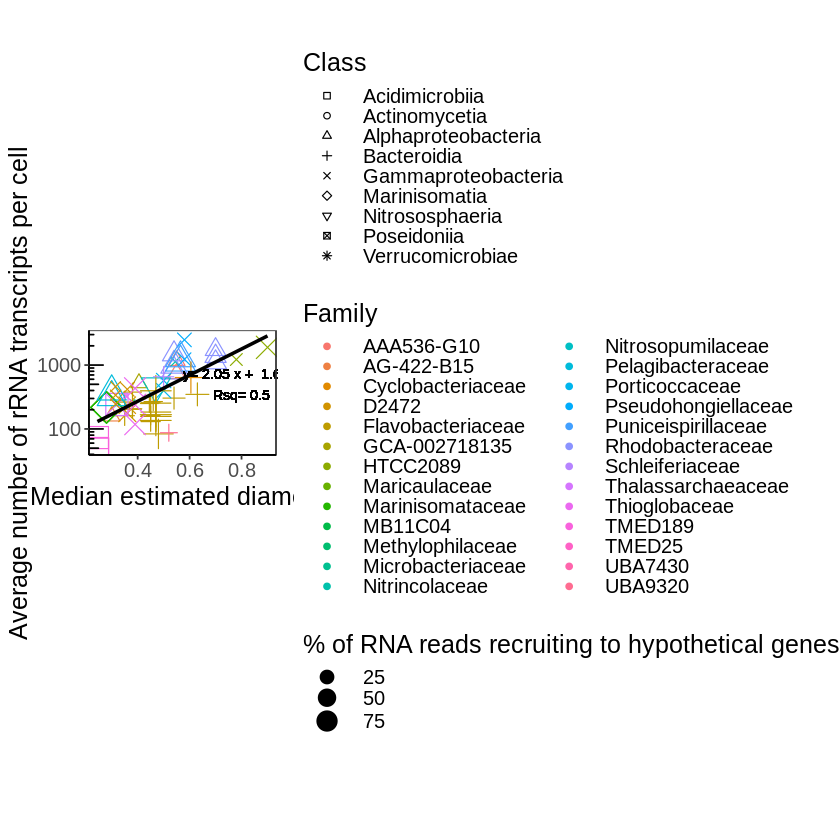

In [25]:
#define (x,y) vectors for plotting
x <- input_data$median.estimated.diameter
y <- input_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p11 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=percent_reads_hypothetical, shape=Class)) + 
  #      scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(100,1000)) +
        annotation_logticks(sides='l') + 
        labs(x='Median estimated diameter', y='Average number of rRNA transcripts per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        scale_size(name ='% of RNA reads recruiting to hypothetical genes') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.8, y = 500),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_rRNA_estimated_diameter_ggplot_hypothetical_reads_no2017.pdf", width=15, height=10, units = "in")        

print(p11)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61554 -0.22558 -0.03715  0.20852  0.82159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0571     0.1252   8.443 3.44e-12 ***
x             0.8896     0.2679   3.320  0.00145 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3006 on 68 degrees of freedom
Multiple R-squared:  0.1395,	Adjusted R-squared:  0.1268 
F-statistic: 11.02 on 1 and 68 DF,  p-value: 0.00145



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



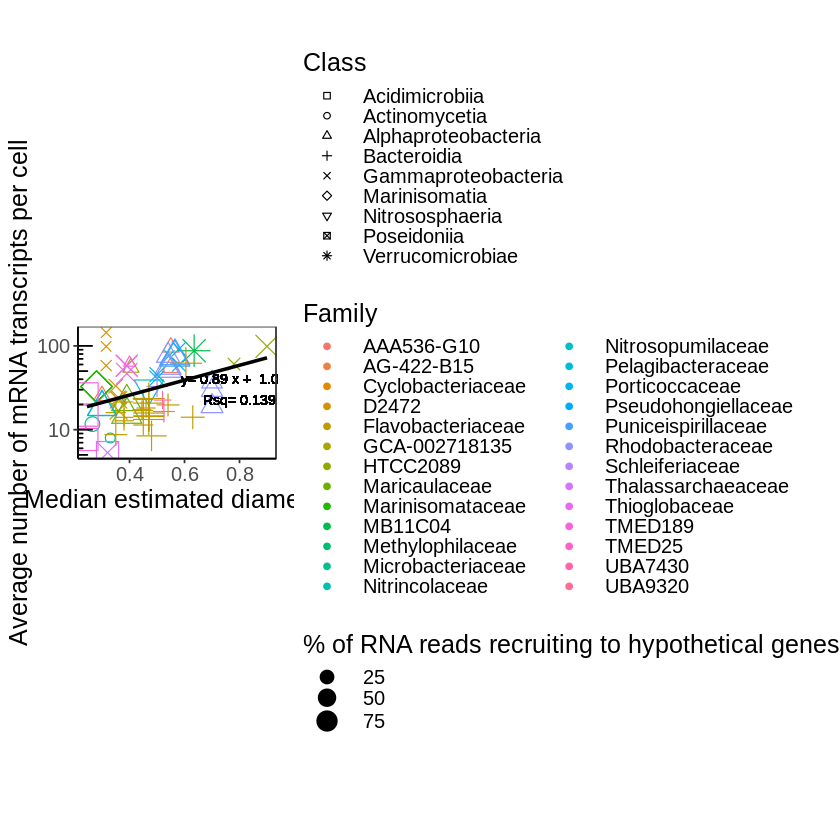

In [26]:
#define (x,y) vectors for plotting
x <- input_data$median.estimated.diameter
y <- input_data$mRNA_transcripts_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p12 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, size=percent_reads_hypothetical, shape=Class)) + 
 #       scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(10,100,1000)) +
        annotation_logticks(sides='l') + 
        labs(x='Median estimated diameter', y='Average number of mRNA transcripts per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        scale_size(name ='% of RNA reads recruiting to hypothetical genes') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.8, y = 30),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("Log10_mRNA_estimated_diameter_ggplot_hypothetical_reads_no2017.pdf", width=15, height=10, units = "in")        

print(p12)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26303 -0.22782  0.03428  0.28846  1.23146 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.17194    0.17990  17.632  < 2e-16 ***
x            0.27322    0.07177   3.807 0.000179 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4978 on 242 degrees of freedom
  (94 observations deleted due to missingness)
Multiple R-squared:  0.0565,	Adjusted R-squared:  0.0526 
F-statistic: 14.49 on 1 and 242 DF,  p-value: 0.0001785



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Warning message:
“Removed 94 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 94 rows containing missing values (geom_point).”
Warning message:
“Removed 94 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 94 rows containing missing values (geom_point).”


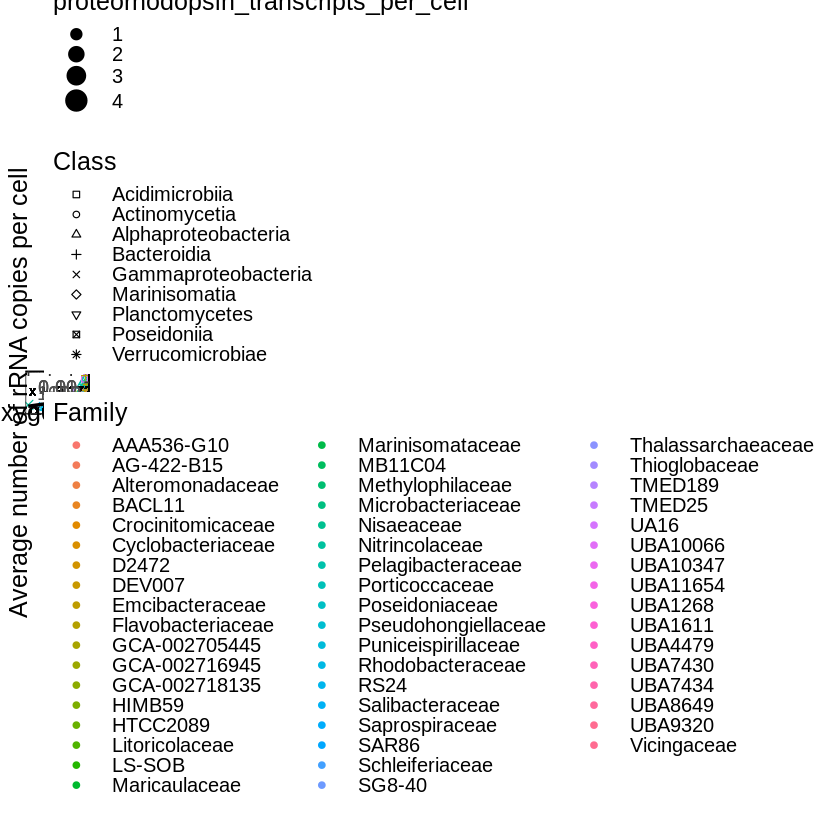

In [27]:
tmp_data <-subset(all_genera, proteorhodopsin_transcripts_per_cell <=5)
tmp_data <- subset(tmp_data, proteorhodopsin_transcripts_per_cell !=0)
tmp_data <- subset(tmp_data, Family !='Unclassified')
tmp_data <- subset(tmp_data, Family !='')

#define (x,y) vectors for plotting
x <- tmp_data$Weighted_avg_O2_consumed_per_cell
y <- tmp_data$X16S_copies_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p1c <- ggplot(tmp_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class, size=proteorhodopsin_transcripts_per_cell)) + 
        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(10, 100,1000)) +
        annotation_logticks() + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='Average number of rRNA copies per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_size(name ='Rhodhopsin transcripts per cell') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y = 500),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black')) +
        scale_size_continuous(range = c(1,4))+ scale_size_area()


                                            
ggsave("Log10_rRNA_weighted_avg_O2_consumed_R3_ggplot_16S_O2_rhodhopsin_allgenera.pdf", width=15, height=10, units = "in")        

print(p1c)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5747 -0.4776 -0.2842  0.0378  8.8305 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.09191    0.35834  -0.256   0.7977  
x           -0.24695    0.13966  -1.768   0.0778 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.013 on 399 degrees of freedom
Multiple R-squared:  0.007775,	Adjusted R-squared:  0.005288 
F-statistic: 3.127 on 1 and 399 DF,  p-value: 0.07779



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



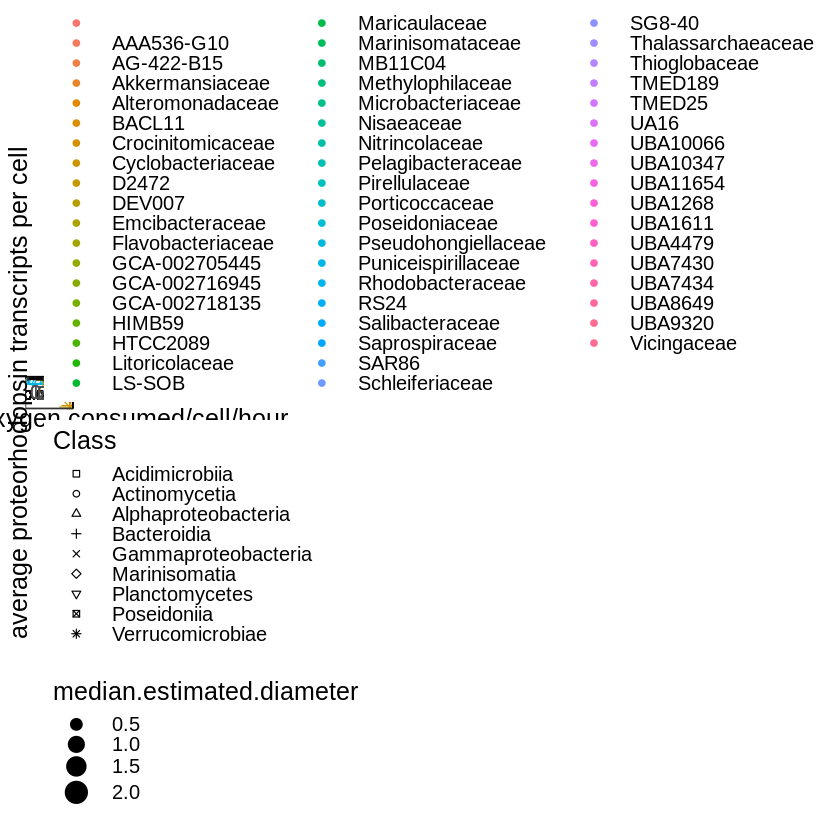

In [28]:
tmp_data <-subset(all_genera, proteorhodopsin_transcripts_per_cell <=10)

#define (x,y) vectors for plotting
x <- tmp_data$Weighted_avg_O2_consumed_per_cell
y <- tmp_data$proteorhodopsin_transcripts_per_cell

#create linear regression model
data_frame <- data.frame(log10(x), (y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)


p1c <- ggplot(tmp_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class, size=median.estimated.diameter)) + 
        scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
    #    scale_y_log10(breaks=c(10, 100,1000)) +
        annotation_logticks(sides='b') + 
        labs(x='Weighted fmol oxygen consumed/cell/hour', y='average proteorhodopsin transcripts per cell') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_size(name ='Median estimated diameter') +
        scale_color_discrete(name='Family') +
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.6, y =2),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black')) +
        scale_size_continuous(range = c(1,4))+ scale_size_area()


                                            
ggsave("Log10_avg_O2_consumed_rhodhopsin_allgenera.pdf", width=15, height=10, units = "in")        

print(p1c)

,X,genus,date,Weighted_avg_O2_consumed_per_cell,proteorhodopsin_transcripts_per_cell,spherical.cell.volume..µm3.,rhodopsin_transcripts_per_µm3,O2_fraction
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3,AAA536-G10,20181030,0.003446755,0.33936688,0.08711375,3.895675,low
2,4,AAA536-G10,20190402,0.004542563,1.69774861,0.08711375,19.488872,low
3,5,AAA536-G10,20190709,0.002253796,0.67722211,0.08711375,7.773998,below_detection
4,6,AG-337-I02,20181030,0.010499640,0.27405763,0.03478273,7.879129,mid
5,7,AG-337-I02,20190402,0.002369015,0.09635568,0.03478273,2.770216,below_detection
6,8,AG-337-I02,20190709,0.002253796,0.35726704,0.03478273,10.271391,below_detection


Saving 6.67 x 6.67 in image



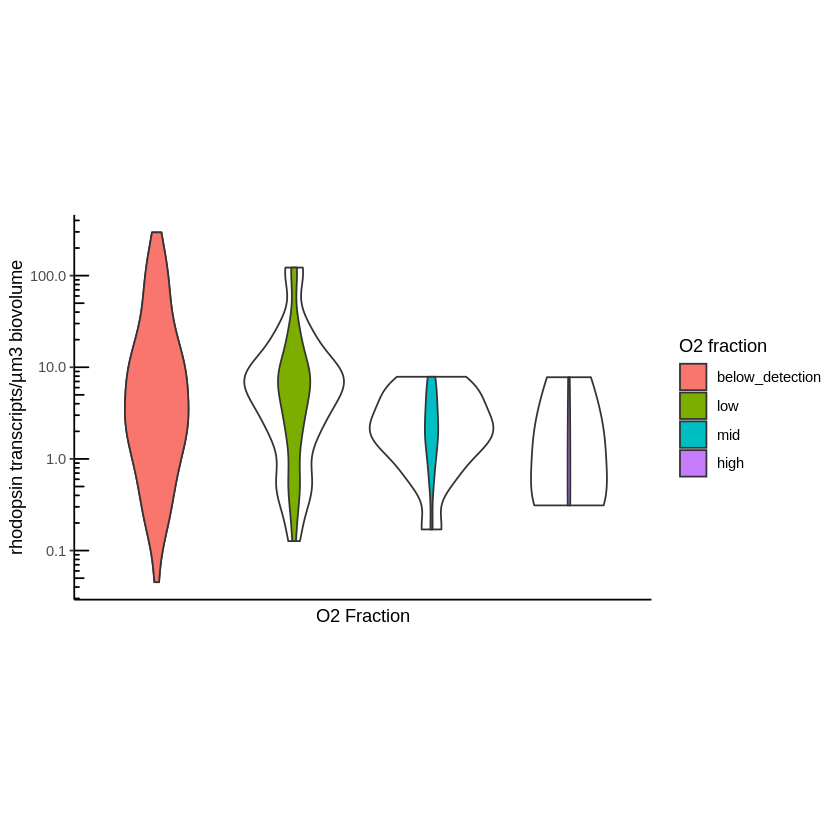

In [29]:
setwd('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/csv_files_for_figures/')
rhod_data <- read.csv(file='Fig3F_rhodopsin_per_µm.csv', header=TRUE)
head(rhod_data)

rhod_data$O2_fraction <- factor(rhod_data$O2_fraction, levels= c('below_detection', 'low', 'mid', 'high'))

p <- ggplot(data=rhod_data, aes(O2_fraction, rhodopsin_transcripts_per_µm3))
p + geom_violin() + geom_violin(aes(fill = O2_fraction), scale="count") +
   theme_classic() +
   theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
 #  stat_summary(fun.rhod_data="mean_sdl" ) +
 #  stat_summary(fun.rhod_data=mean_sdl, fun.args= list(mult=2), geom="pointrange", color="red") +
   scale_y_log10() +
   annotation_logticks(sides="l") +
   theme(aspect.ratio=2/3) +
   labs(x='O2 Fraction', y="rhodopsin transcripts/µm3 biovolume", fill='O2 fraction')
ggsave('Fig3F_Rhodopsin_per_µm_biovolume.pdf', plot = last_plot())


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97903 -0.29570 -0.06557  0.13874  1.90466 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.9483     0.2060 -14.315  < 2e-16 ***
x             1.9337     0.4407   4.387 4.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4944 on 68 degrees of freedom
Multiple R-squared:  0.2206,	Adjusted R-squared:  0.2092 
F-statistic: 19.25 on 1 and 68 DF,  p-value: 4.092e-05



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.



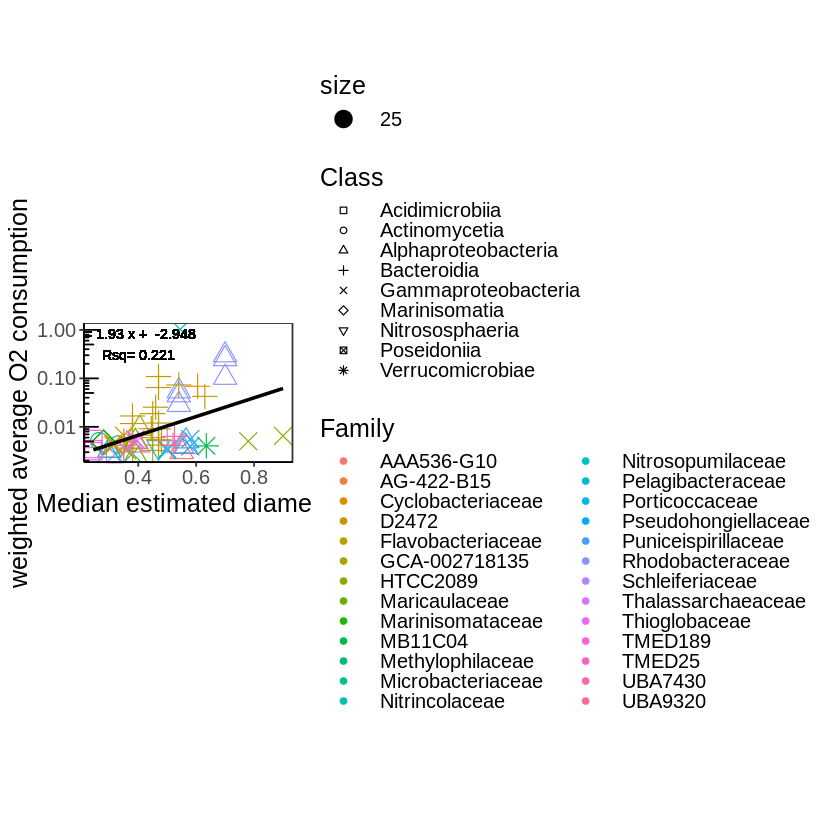

In [30]:
#define (x,y) vectors for plotting
x <- input_data$median.estimated.diameter
y <- input_data$Weighted_avg_O2_consumed_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p13 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class, size=25)) + 
 #       scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(0.001, 0.01, 0.1, 1)) +
        annotation_logticks(sides='l') + 
        labs(x='Median estimated diameter', y='weighted average O2 consumption') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.4, y =0.5),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("estimated_diameter_Log10_O2_consumption_no2017.pdf", width=15, height=10, units = "in")        

print(p13)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97903 -0.29570 -0.06557  0.13874  1.90466 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.9483     0.2060 -14.315  < 2e-16 ***
x             1.9337     0.4407   4.387 4.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4944 on 68 degrees of freedom
Multiple R-squared:  0.2206,	Adjusted R-squared:  0.2092 
F-statistic: 19.25 on 1 and 68 DF,  p-value: 4.092e-05



Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


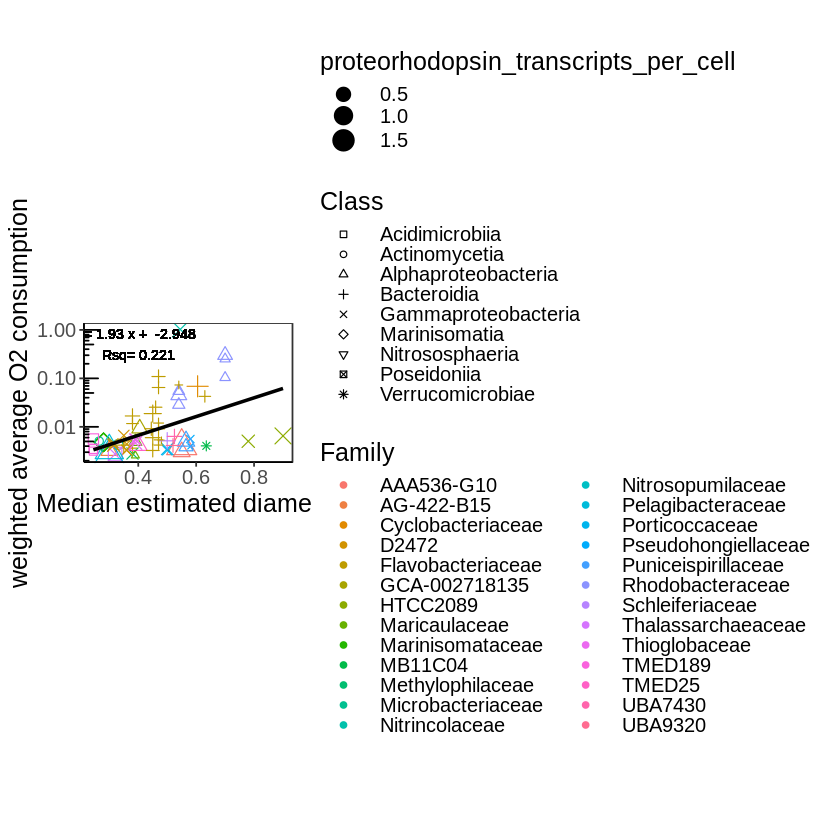

In [31]:
#define (x,y) vectors for plotting
x <- input_data$median.estimated.diameter
y <- input_data$Weighted_avg_O2_consumed_per_cell

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p13 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(aes(color=Family, shape=Class, size=proteorhodopsin_transcripts_per_cell)) + 
 #       scale_x_log10(breaks=c(0.001, 0.01, 0.1, 1.0)) +
        scale_y_log10(breaks=c(0.001, 0.01, 0.1, 1)) +
        annotation_logticks(sides='l') + 
        labs(x='Median estimated diameter', y='weighted average O2 consumption') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        scale_shape_discrete(name= 'Class')+
        scale_color_discrete(name='Family') +
        
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        scale_shape_manual(values = 0:8) +
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 0.4, y =0.5),  alpha=1, colour='black', size=3) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black'))


                                            
ggsave("estimated_diameter_Log10_O2_consumption_rhodopsin_size_no2017.pdf", width=15, height=10, units = "in")        

print(p13)


Call:
lm(formula = y ~ ., data = data_frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0715 -0.2600 -0.1250  0.1632  2.3937 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.55350    0.04095  -62.36   <2e-16 ***
x            1.12493    0.06926   16.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5273 on 831 degrees of freedom
Multiple R-squared:  0.241,	Adjusted R-squared:  0.2401 
F-statistic: 263.8 on 1 and 831 DF,  p-value: < 2.2e-16



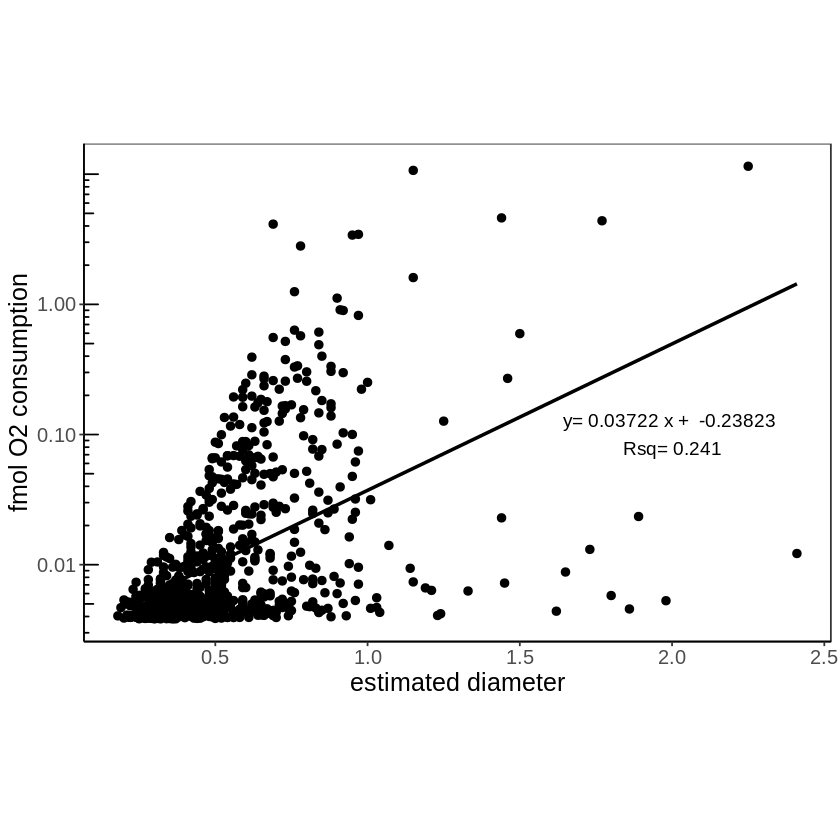

In [32]:
input_data <- read.csv(file="/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate.csv", header=TRUE, stringsAsFactors = FALSE)
input_data <- input_data[!is.na(input_data$Predicted_respiration_rate_fmol_O2perhr),]
input_data <- input_data[input_data$FACS_date==input_data$Sample_collection_Date,]
input_data <- input_data[input_data$FACS_date>=181020,]

#define (x,y) vectors for plotting
x <- input_data$estimated_diameter
y <- input_data$Predicted_respiration_rate_fmol_O2perhr

#create linear regression model
data_frame <- data.frame((x), log10(y))
colnames(data_frame) <- c("x","y")
my_model <- lm(y~., data_frame)
print(summary(my_model))

#extract values from model
R2 <- signif(summary(my_model)$r.squared, 3)
intercept <- signif(my_model$coef[[1]],4)
slope <- signif(my_model$coef[[2]],3)

p14 <- ggplot(input_data, aes(x=x, y=y)) + 
        geom_point(size=2) + 
        scale_y_log10(breaks=c(0.001, 0.01, 0.1, 1)) +
        annotation_logticks(sides='l') + 
        labs(x='estimated diameter', y='fmol O2 consumption') +
        theme_bw() + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
        theme(aspect.ratio=10/15) +
        
        geom_smooth(method="lm", se=FALSE, color="black", formula =y~x)+
        geom_text(aes(label = paste("y=",slope,"x + ",intercept,"\nRsq=",R2), x = 2, y =0.1),  alpha=1, colour='black', size=4, check_overlap=TRUE) +
        theme(legend.key.width = unit(1,"cm"), legend.key.height = unit(0.4,"cm")) +
        theme(text = element_text(size = 15, color='black')) 


                                            
ggsave("estimated_diameter_Log10_O2_consumption_per_cell.pdf", width=15, height=10, units = "in")        

print(p14)

In [33]:
colnames(input_data)

[1] "X2"                                     
 [2] "name"                                   
 [3] "Plate"                                  
 [4] "well_type"                              
 [5] "wga_cp"                                 
 [6] "wgs_run_id"                             
 [7] "raw_read_count"                         
 [8] "final_assembly_length"                  
 [9] "max_contig_length"                      
[10] "gc_content"                             
[11] "checkM_estimated_completeness"          
[12] "total_CDS_count"                        
[13] "hypothetical_cds_fraction"              
[14] "average_cds_length"                     
[15] "number_multi_copy"                      
[16] "checkM_classification"                  
[17] "SSU_classification_1"                   
[18] "SSU_classification_2"                   
[19] "SSU_classification_3"                   
[20] "notes"                                  
[21] "eventnum"                               
[22] "well2"                                  
[23] "X531.40..488."                          
[24] "X572.27..488."                          
[25] "X692.40..488."                          
[26] "Trigger.Pulse.Width"                    
[27] "SSC"                                    
[28] "FSC"                                    
[29] "estimated_diameter"                     
[30] "PCA_analysis_Action"                    
[31] "PCA_analysis_Note"                      
[32] "Location"                               
[33] "Sample_collection_Date"                 
[34] "FACS_date"                              
[35] "gate"                                   
[36] "depth..m."                              
[37] "sample"                                 
[38] "slope"                                  
[39] "intercept"                              
[40] "normalized_531_value"                   
[41] "Predicted_respiration_rate_fmol_O2perhr"
[42] "lower_resp_bound"                       
[43] "upper_resp_bound"